In [ ]:
# Investigating Netflix Movies and Guest Stars in The Office

 ## 1. Loading the data from a CSV 
 It appears that there might be some truth to the notion that movie lengths have shortened in recent years. However, my understanding is limited by the aggregated information provided by our friend. There are still some unanswered questions about this trend, such as:

1. How does this trend compare over a longer time frame?
2. Could this trend be attributed to certain types of entertainment genres?

To delve deeper into this topic, I have acquired the original CSV file from our friend, which can be found at the file path "datasets/netflix_data.csv". To get a better understanding of the data, I will create a new DataFrame and inspect its first five rows, rather than printing the entire DataFrame, as it is quite lengthy.

In [1]:
# Import pandas under its usual alias
import pandas as pd
# Import matplotlib.pyplot under its usual alias and create a figure
import matplotlib.pyplot as plt
# Read in the CSV as a DataFrame
netflix_df = pd.read_csv(r"C:\Users\Pc\Desktop\Python_Project\Investigating-Netflix-Movies\netflix_data.csv")
# Print the head of the DataFrame
print(netflix_df[:5])

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year  duration  \
0    August 14, 2020          2020         4   
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009        80   
4    January 1, 2020          2008       123

## 2. Filtering for movies 

I have Netflix data with movies and TV shows. The "duration" column has different values for movies and TV shows. I will create a new DataFrame "netflix_movies" with only the relevant columns and only containing movie data. Time to put my data subsetting skills to use!


In [2]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df['type']=='Movie']
netflix_movies_col_subset = netflix_df_movies_only[['title', 'country', 'genre', 'release_year', 'duration']]

# Print the first five rows of the new DataFrame
netflix_movies_col_subset[:5]

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


## 3. Creating a scatter plot


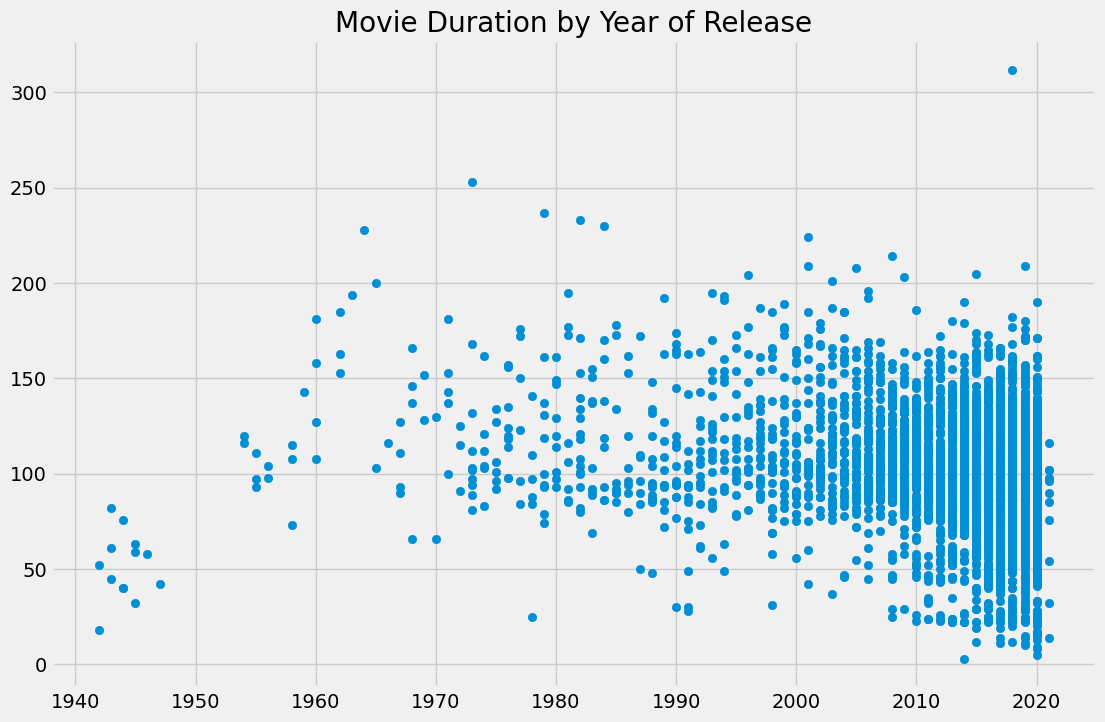

In [8]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset['release_year'],netflix_movies_col_subset['duration'])

# Create a title
plt.title('Movie Duration by Year of Release')

# Show the plot
plt.show()

## 4. Digging deeper
I observe a trend of short films on Netflix and will examine their genres to gain insight.


In [7]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration']<70]

# Print the first 20 rows of short_movies
short_movies[:15]

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
167,A Fairly Odd Summer,United States,Children,2014,68
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22


## 5. Marking non-feature films

Icould eliminate these rows from our DataFrame and plot the values again. But another interesting way to explore the effect of these genres on data would be to plot them, but mark them with a different color.

In Python, there are many ways to do this, but one fun way might be to use a loop to generate a list of colors based on the contents of the genre column.


In [5]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for lab, row  in netflix_movies_col_subset.iterrows() :
    if row['genre']=='Children' :
        colors.append("red")
    elif row ['genre']=="Documentaries" :
        colors.append("blue")
    elif row['genre']=='Stand-Up':
        colors.append("green")
    else:
        colors.append("pink")
        
# Inspect the first 5 values in your list        
colors[:5]


['pink', 'pink', 'pink', 'pink', 'pink']

## 6. Plotting with colors 
This time, we'll also spruce up our plot with some additional axis labels and a new theme with plt.style.use()

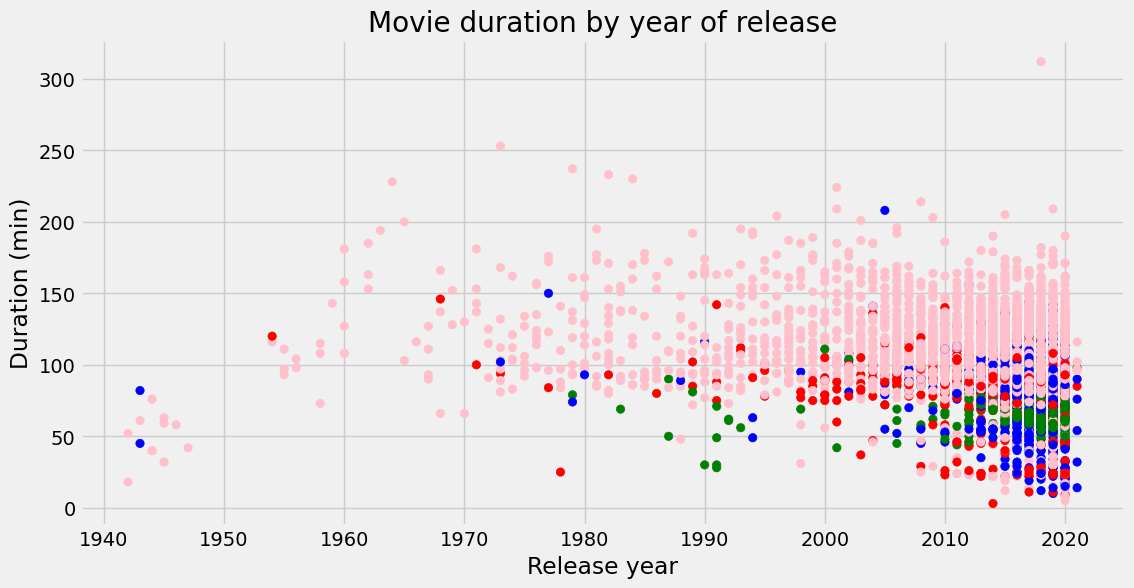

In [6]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))

# Create a scatter plot of duration versus release_year

plt.scatter(netflix_movies_col_subset["release_year"], netflix_movies_col_subset["duration"], c=colors)

# Create a title and axis labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")


# Show the plot
plt.show()